## Assessment for Fundamentals of Data Analysis - GMIT Semester 2 Asessment

## HDip in Computer Science (Data Analysis)
### Tom Healy



In [2]:
#First, let's import the packages we will need.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#As we are plotting on white space, the use of a darkgrid background will add some contrast
sns.set(style="darkgrid")

#We read in the csv file and assign it to the var "df"

df = pd.read_csv('tips.csv')

In [3]:
#Let's print the entire set to evaluate the overall feel lof it. So we can see we have 7 
#columns with 244 rows. We have 3 numerical columns and 4 columns with categorical data.
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

In [4]:
#Bit redundant after the above but we can print the names of the columns
print(df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [5]:
#Let's take a look at the integrity of the data - any missing values. 
df['total_bill'].isnull()
df['tip'].isnull()
df['sex'].isnull()
df['smoker'].isnull()
df['day'].isnull()
df['time'].isnull()
df['size'].isnull()

print ("Here is the number of missing values in the set:\n",df.isnull().sum())

#Looks like we have good set (:-)) with no missing values


Here is the number of missing values in the set:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [6]:
#This would have dropped any row with missing values from our dataset, it returned all rows will full features
df.dropna()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
#Another check for missing data, a True value is returned for a missing value 
df.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [8]:
#Next we describe the numerical values in the set
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [9]:
# The df dataset contains floats, objects(strings) and intergers
print(df.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [10]:
#Number of Rows and Columns
print(df.shape)


(244, 7)


In [11]:
#We are going to add another column to our datset. This column is the percetage of tip to total bill. This may come in handy later.
df['tip_pct'] = df['tip'] / df['total_bill']

In [12]:
print(df.describe())

       total_bill         tip        size     tip_pct
count  244.000000  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672    0.160803
std      8.902412    1.383638    0.951100    0.061072
min      3.070000    1.000000    1.000000    0.035638
25%     13.347500    2.000000    2.000000    0.129127
50%     17.795000    2.900000    2.000000    0.154770
75%     24.127500    3.562500    3.000000    0.191475
max     50.810000   10.000000    6.000000    0.710345


In [13]:
#Let's check that worked
print(df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')


In [14]:
#Printing to the screen the percentage value of total bill / tip, the first 10 only.
print(df['tip_pct'].head(10))

0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
5    0.186240
6    0.228050
7    0.116071
8    0.130319
9    0.218539
Name: tip_pct, dtype: float64


In [15]:
# Shows the non numeric counts, we have 244 
print(df.count())

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
tip_pct       244
dtype: int64


### df.describe()

In [16]:
#Shows the top 5 rows by tip value. The Sort and Groups are some of the most inportant in DS.
df.sort_values(by=['tip'],ascending=False).head(5)



,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192288
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
141,34.30,6.70,Male,No,Thur,Lunch,6,0.195335


In [17]:
#Here we are sorting on the size of the total bill. Row 170 had the highest bill amount.
df.sort_values(by=['total_bill'],ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178


In [18]:
#Here we are sorting on the tip [ct column we added. Row 172 had the highest tip pct. (Happened on a Sunday, maybe they 
#were getting rid of change from night before :-)) 
df.sort_values(by=['tip_pct'],ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535


In [19]:
#Same again except we sorting from the bottom up. 3%... ouch
df.sort_values(by=['tip_pct'],ascending=False).tail(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638


In [20]:
df.sort_values(by=['total_bill'],ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178


In [21]:
df.groupby(['sex']).mean()

,total_bill,tip,size,tip_pct
sex,,,,
Female,18.056897,2.833448,2.459770,0.166491
Male,20.744076,3.089618,2.630573,0.157651


In [22]:
#Here we are selecting the first 4 rows, indexed from 0 not 1
df[0:4]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780


In [23]:
#Here we are selected just the first row
df.loc[0]

total_bill        16.99
tip                1.01
sex              Female
smoker               No
day                 Sun
time             Dinner
size                  2
tip_pct       0.0594467
Name: 0, dtype: object

In [24]:
#Here are selecting 0-10 rows but based only on the tip and sex columns
df.loc[0:10, ['tip', 'sex'],]

,tip,sex
0,1.01,Female
1,1.66,Male
2,3.50,Male
3,3.31,Male
4,3.61,Female
5,4.71,Male
6,2.00,Male
7,3.12,Male
8,1.96,Male
9,3.23,Male


## Plotting
In this section, I will usoiing plots fro the seaborn tutorial page. I am changing around layouts (swapping x and y), colors (using sex or time as hues) and changinh the orientation to add some variation in the plots but the Seaborn Turtorial is the touchstone for this part.

C:\Users\Teamwork\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


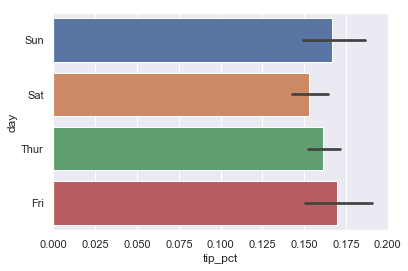

In [25]:
sns.barplot(x='tip_pct', y ='day', data=df, orient='h')

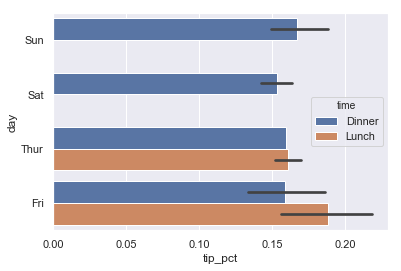

In [26]:
sns.barplot(x='tip_pct', y ='day' , hue='time', data=df, orient='h')


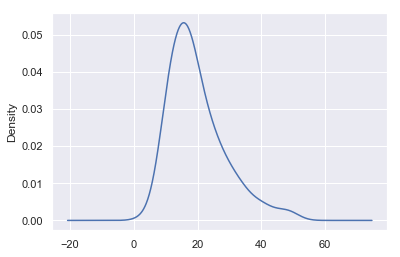

In [27]:
df['total_bill'].plot.density()

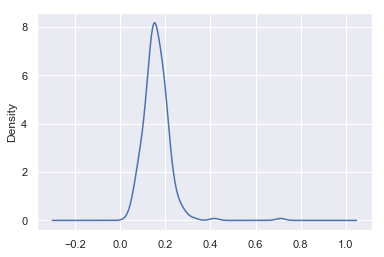

In [28]:
#Here we can see a plot of the frequency of the values in 'tip_pct'. If we remeber that the mean of the tip pct was .16 
#approx from our descripbe function earlier this agrees with what we are seing here. We also see two smalll bump around
#the .4 and .7 mark. We should investigate.

df['tip_pct'].plot.density()

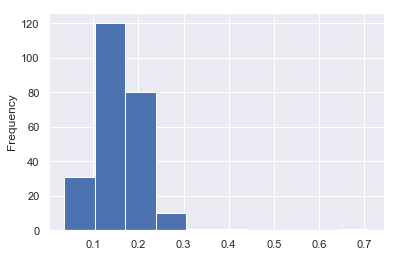

In [29]:
#We can investugate by using a histogram. We chnage the level of granularity by adjust the bins. A bin number of 10 gives us the
#general shape but the nuances at .4 and .7 have been lost. Let's try again with more detail.
df['tip_pct'].plot.hist(bins=10)

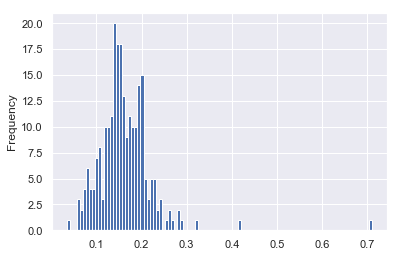

In [30]:
#Here we can see the outliers quite easily because of the granularity we have introduced.
df['tip_pct'].plot.hist(bins=100)

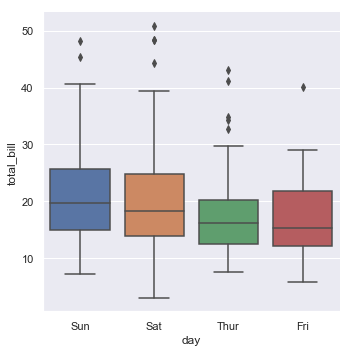

In [31]:
#This is taken verbatim from the Seaborn Tutorial
sns.catplot(x="day", y="total_bill", kind="box", data=df);


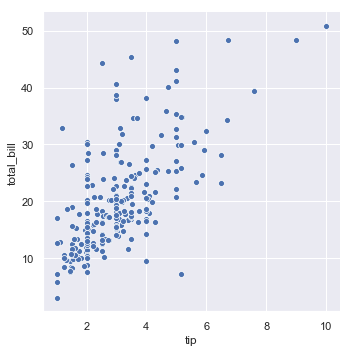

In [32]:
#This is the main plot for the regression part. I swapped the x and y to change it from the tutorial.
sns.relplot(x="tip", y="total_bill", data=df);

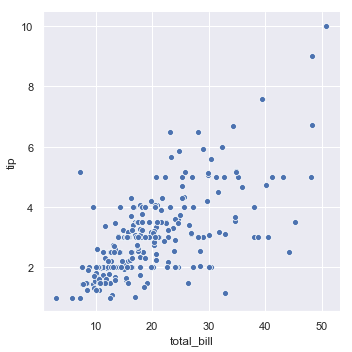

In [33]:
sns.relplot(x="total_bill", y="tip", data=df);

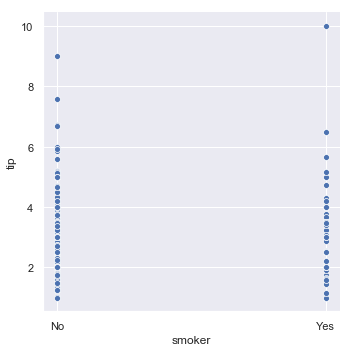

In [34]:
sns.relplot(x="smoker", y="tip", data=df);

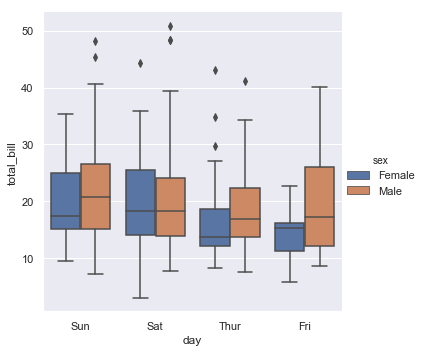

In [35]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=df);

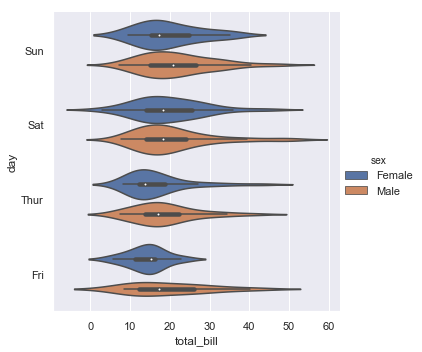

In [36]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=df);

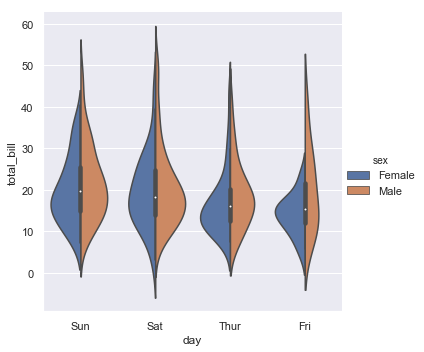

In [37]:
#Added the 
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=df);

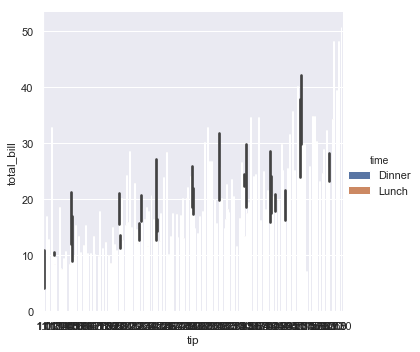

In [38]:
sns.catplot(x="tip", y="total_bill", hue="time", kind="bar", data=df);

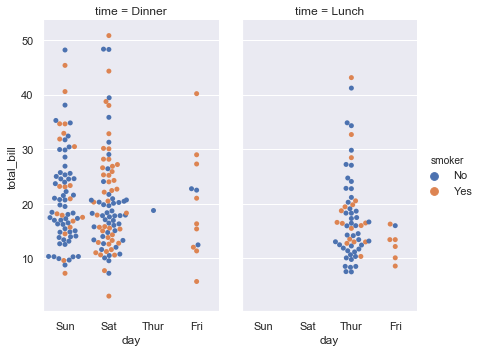

In [39]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=df);

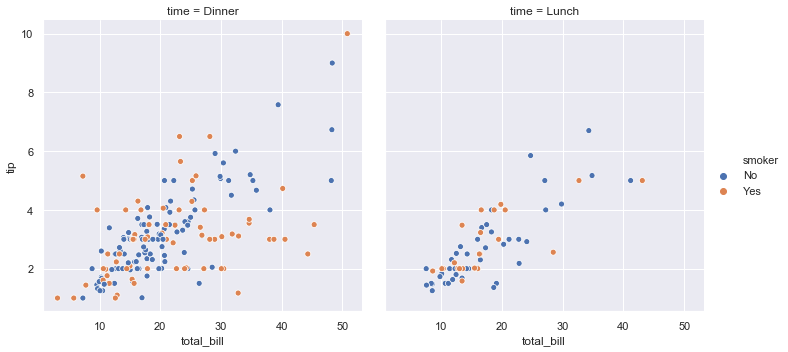

In [40]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=df);

C:\Users\Teamwork\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.04999999999999, 0.5, 'Tip Amount')

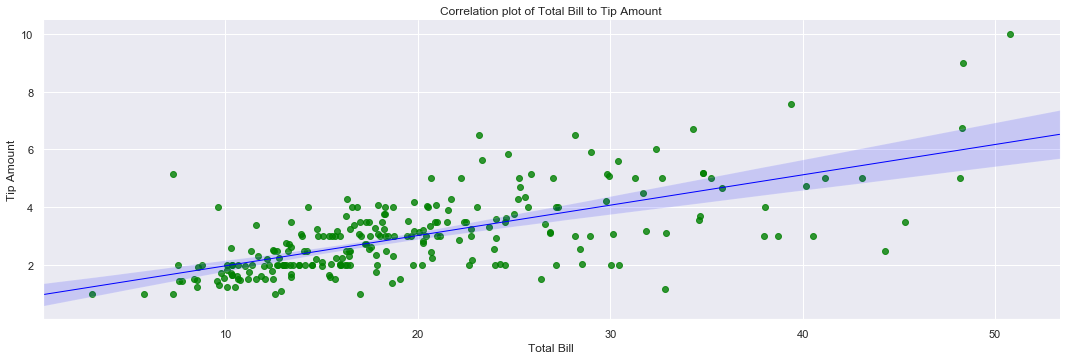

In [56]:
#This is adapted from Susan Li Python for DA (https://github.com/susanli2016/Data-Analysis-with-Python/blob/master/Baseball%2C%20Moneyball.ipynb)
#Line 288
sns.lmplot('total_bill', "tip", df, scatter_kws={'marker':'o', 'color': 'green'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 5, aspect = 3)

plt.title('Correlation plot of Total Bill to Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')